# Comparison of Solar and Wind Suitability in Kech, Pakistan

* **Author:** Margaret Chingos

* **Student ID:** 220000060

* **Date:** 10 December 2024

**Abstract:**
Acknowledging Pakistan’s energy crisis and need for renewable energy sources, this project compares the potential for wind and solar development in Kech, Pakistan. Using MCE in QGIS and data analysis in Python, it finds that 42.66% of Kech is 'most suitable' for solar, and 11.57% is 'most suitable' for wind. It concludes that Kech has more opportunities for solar development. This data is displayed spatially in suitability maps and quantitatively in a bar chart.

**Keywords:** Renewable energy, Multi-Criteria Evaluation, Pakistan

# GitHub Repository
- **GitHub Link:** https://github.com/margaretchingos/GG3209-Final-Project

## Declaration

> In submitting this assignment, I hereby confirm that I have read the University's statement on Good Academic Practice. The following work is my own. Significant academic debts and borrowings have been properly acknowledged and referenced.


**Table of Contents:**

* Introduction
* Methods
* Results
* Discussion
* Conclusion
* References

## Introduction

This project aims to compare the potential for wind and solar renewable energy development in Kech Pakistan by answering the research question: Are there more opportunities for solar or wind development in Kech, Pakistan?

This research has significance at both global and local levels. Globally, it will contribute to discussions on the renewable energy transition. Currently, fossil fuels generate nearly 80% of global electricity and account for almost 99% of greenhouse gas emissions. Transitioning to renewable energy sources like wind and solar can reduce fossil fuel dependence and mitigate global warming (Rehik, Alimi, 2023). Locally, this research addresses Pakistan's energy crisis. The country faces energy challenges due to population growth and reliance on imported fossil fuels. In rural areas like Kech, power outages last 14–18 hours (Ghafoor, et al, 2016). By identifying suitable locations for wind and solar installations, this report will advance Pakistan's adoption of stable renewable energy sources to address its energy deficit.

Research has established Pakistan's potential for solar and wind development. The country's geographical features favor both energy sources. Pakistan receives 5.5 Wh m−2 d−1 solar insolation with 8–10 hours of daily sunshine, making it ideal for solar power. Additionally, wind speeds of 5–7 m s−1 in Sindh and Baluchistan's coastal regions offer over 20,000 MW of feasible wind power potential (Ghafoor, et al, 2016). Pakistan has developed some renewable energy projects. As of 2018, Pakistan generated 100 MW from solar and 308 MW from wind annually, with plans to add 856 MW of solar and 1,140 MW of wind capacity (Kamran, 2018).

This report addresses a research gap by examining renewable energy suitability in Kech, a region with limited renewable energy development. While Baluchistan, where Kech is located, ranks among Pakistan's prime regions for both solar (Kamran, 2018) and wind development (Ghafoor, et al, 2016), Kamran's assessment found no operational wind plants or proposed solar facilities in Baluchistan (2018). This lack of development is due to insufficient funds and technical skills (Ghafoor, et al, 2016). Given these constraints, this report targets specific areas and technologies (wind vs. solar) to optimize resource allocation. This approach will help Kech, a region with high energy potential but limited development, advance its renewable energy transition.

To answer the research question, this report will create MCE maps to assess wind and solar suitability in Kech. These maps will illustrate varying suitability levels and enable spatial comparison of wind and solar potential. A bar chart will quantitatively compare overall suitability levels to determine which energy type offers greater development opportunities.



## Methodology




**Preprocessing**: The following cells of code will mount my drive and install necessary packages and libraries required for the project.

In [ ]:
# Mount my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install earthpy

In [ ]:
pip install lonboard

In [ ]:
pip install rasterio

In [ ]:
# Import necessary libraries for your project
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import numpy as np

import rasterio as rio
from rasterio import plot
from rasterio.plot import show
from rasterio.plot import show_hist


import earthpy.plot as ep

import lonboard
from lonboard import viz

plt.rcParams['figure.figsize'] = [10, 8] #sets parameters for all graphic outputs

**Study Area:** Reseach will be conducted on the Kech district in Pakistan. The significance of this district is explained in the Introduction. The region can be visualized here:

In [61]:
# Show the area of study using mattplotlib
study_area = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/final project/Study_Area.gpkg')
gdf = gpd.GeoDataFrame(study_area)
viz(gdf)

Map(basemap_style=<CartoBasemap.DarkMatter: 'https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json'…

**Data Sources:** To create the MCE’s of wind and solar suitability in Kech on QGIS, the following data sources were used.
- Kech boundary: Humanitarian Data Exchange (https://data.humdata.org/dataset/cod-ab-pak)
- Windspeed: The global wind atlas (https://globalwindatlas.info/en/area/Pakistan)
- Landuse, Roads and Powerlines: Open street map (https://download.geofabrik.de/asia/pakistan.html)
- Slope and Solar Radiation: Global solar atlas (https://globalsolaratlas.info/download/pakistan)


**Method 1: MCE on QGIS**
The first method this project uses is MCE in QGIS. MCE is a method that takes multiple criteria and creates a normalized raster that solves suitability problems. The goal of this method is to create a raster layer that displays a suitability gradient from 0 (least suitable) to 1 (most suitable) over the district of Kech. This method helps answer the research question by determining levels of suitability for wind and solar development across areas in Kech. The raster data from MCE, with its values from 0-1, will be the base upon which data analysis is conducted to answer the research question.

This report will follow the methods set out by Rekik and Alimi in their MCE evaluation of wind-solar site selection (2023). They used the following criteria for their wind MCE, which have been adopted for this report:
- Wind Speed - areas of higher wind speed are more suitable.
- Slope - slope was both a constraint (where areas with a slope greater than 10% were unsuitable) and a criterion where areas with greater slope are less suitable. This is because it is cheaper to build on flatter terrain.
- Distance to roads - areas closer to roads are more suitable because they allow for ease of accessibility during building and operating phases.
- Power Lines - lacking power line data, it was assumed that power lines run along primary and trunk roads. Areas closer to power lines are more suitable because they reduce connection costs and power loss.
- Distance to urban areas - areas closer to urban spaces are more suitable because proximity to populated areas avoids the distribution of energy over long distances.
- Land Use - this was a constraint where urban areas, residential zones, and military areas were designated as 0’s (unsuitable). This is because these areas are already utilized and do not have space for wind or solar plants.

In the solar MCE, all criteria were the same except direct normal irradiance (DNI), which replaced wind speed. For the DNI criteria, areas that received more irradiance were more suitable.

When combining the above criteria for the wind and solar MCEs, the following weights were used:
- Wind/DNI: 44.4684%
- Slope: 18.8516%
- Distance to roads: 15.1963%
- Distance to powerlines: 14.2707%
- Distance to residential areas: 7.213%
- Slope: Constraint
- Land Use: Constraint

These weights follow the weighting suggested by Rekik and Alimi (2023), except they exclude a 15.7% weight for land use. In this project, land use is incorporated as a constraint rather than a criterion. Therefore, the 15.7% was distributed between the other criteria based on their weighting.



**Method 2: Data Analysis in Python**
The second method used in this project is data analysis in Python. The goal of this method is to analyze the wind and solar suitability raster data created through MCE. It will (1) map the raster data by splitting it into categories ranging from least to most suitable for wind and solar, and (2) quantitatively measure if wind or solar has greater areas of suitability. This will help answer the research question by providing spatial and numerical data that determines if there are more opportunities for wind or solar development in Kech.

## Results




Figure 1 shows the suitability rasters for solar and wind plant development generated using MCE on QGIS.

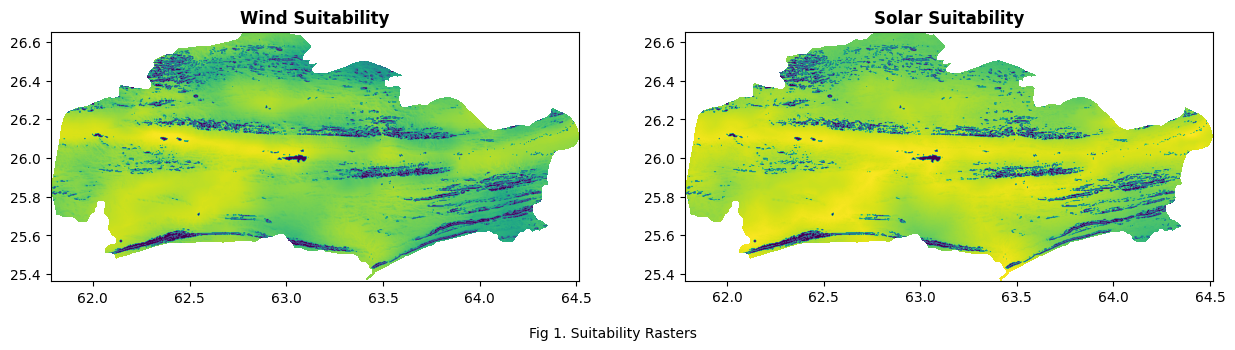

In [ ]:
#Import rasters created on QGIS
wind = rio.open('/content/drive/MyDrive/Colab Notebooks/final project/Wind_Suitability.tif')
solar = rio.open('/content/drive/MyDrive/Colab Notebooks/final project/Solar_Suitability_Final.tif')

# Plot rasters side by side
fig, axes = plt.subplots(1,2, figsize=(15,19))
show(wind, ax=axes[0], title='Wind Suitability')
show(solar, ax=axes[1], title='Solar Suitability')
fig.text(0.5, .4,"Fig 1. Suitability Rasters", ha='center', fontsize=10, )
plt.show()

Using the rasters in Figure 1, histograms can be generated to show the general distribution of suitability data for wind and solar (Figure 2).

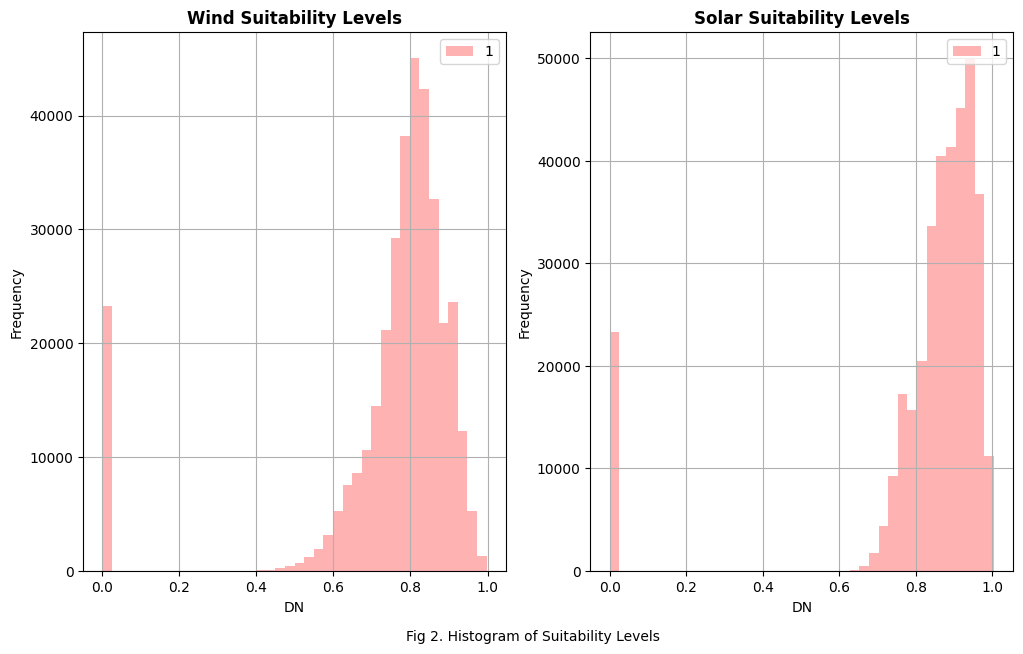

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,7)) #make a figure with 2 subplots
show_hist(wind, ax=axes[0], bins=40, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Wind Suitability Levels") #create a histogram from the wind raster with 40 bins
show_hist(solar, ax=axes[1], bins=40, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Solar Suitability Levels" )#create a histogram from the solar raster with 40 bins
fig.text(0.5, 0.01, "Fig 2. Histogram of Suitability Levels", ha='center', fontsize=10, )
plt.show()

Figure 2 shows that the majority of data points are located between 0.6-1. Using this information, 'bins' can be delinated according to data distribution: [0-0.6, 0.6-0.7, 0.7-0.8, 0.8-0.9, 0.9-1]. These bins signify five categories ranging from least suitable (0) to most suitable (1).

Figure 3 maps plot the raster data assigning unique colors to each bin, where red is 'least suitable' and blue is 'most suitable'.

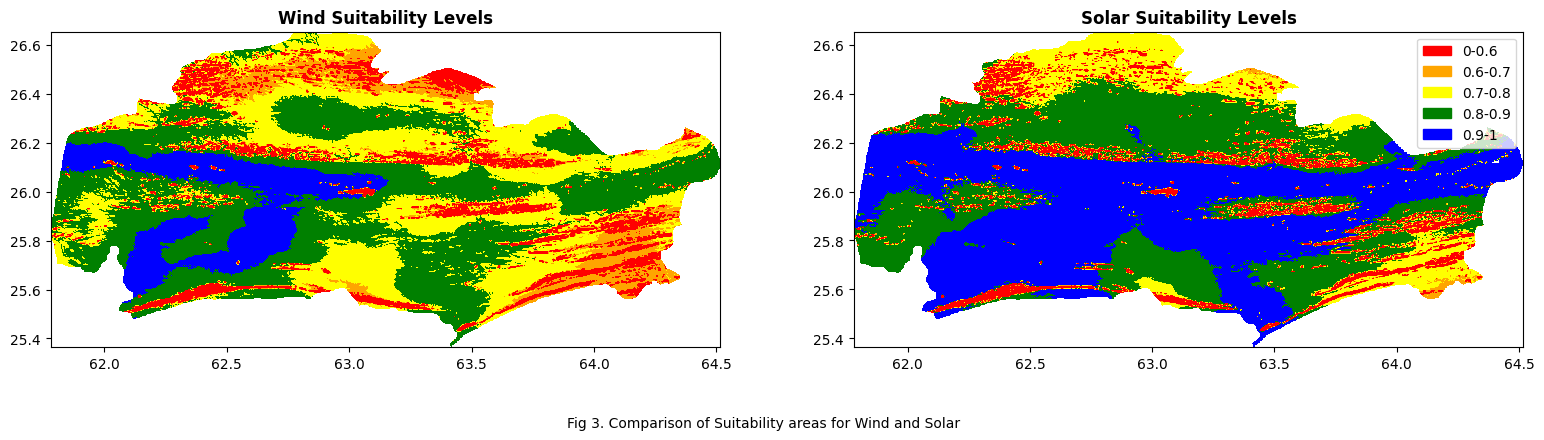

In [66]:
#Using the values from the histogram, will delinate 'bins' of suitability from 0-0.6-1
levels = [0,0.6,0.7,0.8,0.9,1]
clrs = ['red','orange','yellow','green','blue']
cmap, norm = colors.from_levels_and_colors(levels, clrs)

fig, axes = plt.subplots(1,2, figsize=(19,25)) #this creates a figure with 2x1 subplots
raster_plot = show(wind, ax=axes[0], cmap=cmap, norm=norm, title="Wind Suitability Levels")
raster_plot = show(solar, ax=axes[1], cmap=cmap, norm=norm, title="Solar Suitability Levels")

legend = [mpatches.Patch(color='red', label='0-0.6'),
          mpatches.Patch(color='orange', label='0.6-0.7'),
          mpatches.Patch(color='yellow', label='0.7-0.8'),
          mpatches.Patch(color='green', label='0.8-0.9'),
          mpatches.Patch(color='blue', label='0.9-1'),]
plt.legend(handles=legend)
fig.text(0.5, .4,"Fig 3. Comparison of Suitability areas for Wind and Solar", ha='center', fontsize=10, )
plt.show()


Comparing the maps in Figure 3 reveals more blue (most suitable) areas for solar than wind development in Kech.  This provides spatial data to answer the research question.

Comparison of wind and solar suitability can be conducted quantitatively, as well as spatially. Figure 4 uses data extracted from the suitability rasters to compare the number of points of suitability for wind and solar in a bar chart.

In [ ]:
# This finds the counts of different levels of suitability for both wind and solar rasters
with rio.open('/content/drive/MyDrive/Colab Notebooks/final project/Wind_Suitability.tif') as src:
    wind_data = src.read(1)

bins = [0, 0.6, 0.7, 0.8, 0.9, 1] #uses the same bins as Figure 3 so maps and bar chart can be used together an analysis
wind_counts, wind_bin_edges = np.histogram(wind_data, bins=bins)
print('Bin Edges:', wind_bin_edges)
print('Wind Counts:', wind_counts)

with rio.open('/content/drive/MyDrive/Colab Notebooks/final project/Solar_Suitability_Final.tif') as src:
    solar_data = src.read(1)

bins = [0, 0.6, 0.7, 0.8, 0.9, 1]
solar_counts, solar_bin_edges = np.histogram(solar_data, bins=bins)
print('Solar Counts:', solar_counts)

Bin Edges: [0.  0.6 0.7 0.8 0.9 1. ]
Wind Counts: [ 31410  32573 105474 140769  40586]
Solar Counts: [ 23295   2025  44565 131648 149982]


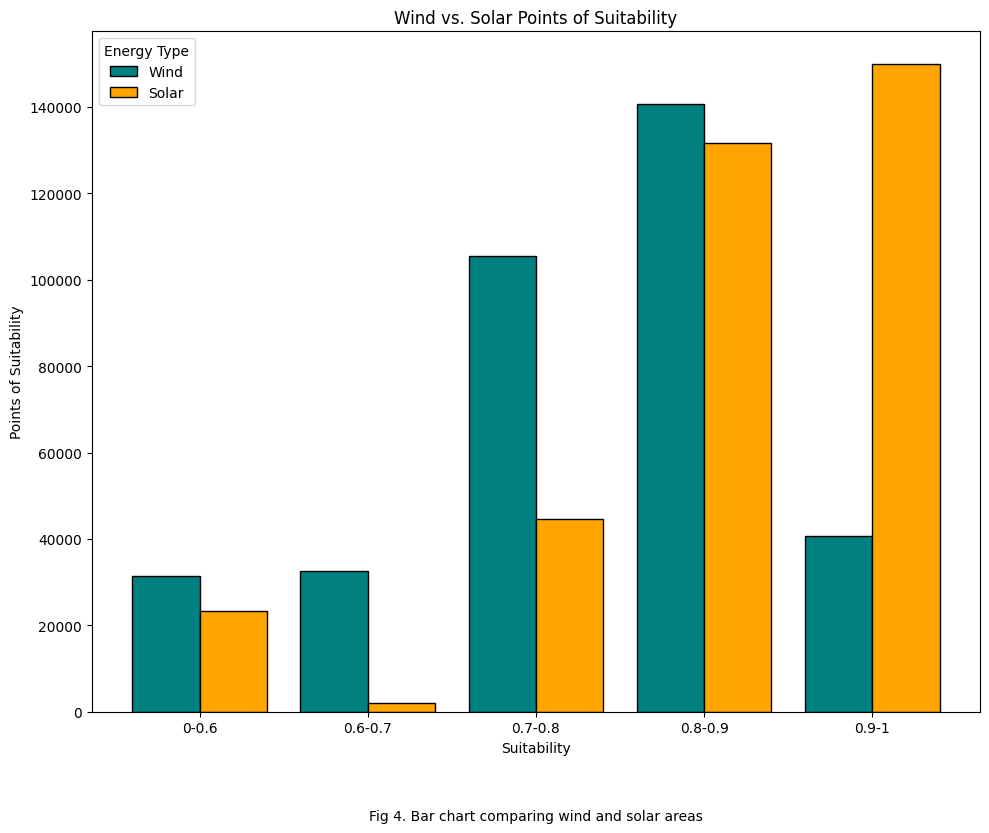

In [ ]:
# This creates the bar chart
# Set data for the figure
bins = ['0-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1']
wind_counts = [31410, 32573, 105474, 140769, 40586]
solar_counts = [23295, 2025, 44565, 131648, 149982]

# Arrange the figure
x = np.arange(len(bins))
bar_width = 0.4

#Adds data to the figure
plt.bar(x - bar_width / 2, wind_counts, width=bar_width, label='Wind', color='teal', edgecolor='black')
plt.bar(x + bar_width / 2, solar_counts, width=bar_width, label='Solar', color='orange', edgecolor='black')

# Add labels + Legend
plt.xticks(x, bins)
plt.xlabel("Suitability")
plt.ylabel("Points of Suitability")
plt.title("Wind vs. Solar Points of Suitability")
plt.legend(title="Energy Type")

# Add figure caption
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.text(len(bins) / 2 - 0.5, -0.15 * max(max(wind_counts), max(solar_counts)),
    "Fig 4. Bar chart comparing wind and solar areas", ha='center', va='top', fontsize=10)

plt.show()


Figure 4 confirms the spatial data in Figure 3, that more areas are suitable for solar than wind development in Kech. For the most suitable category, wind only has 40,586 points compared to solar's 149,982 points. This reveals that 42.66% of Kech's total area is most suitable for solar, and 11.57% is most suitable for wind. In the least suitable category, wind outnumbers solar with 31,410 points to 23,295 points. This provides quantitative data to answer the research question.

## Discussion

The results presented above (Fig 3 and Fig 4) suggest that there are more areas suitable for solar projects than wind projects in Kech, Pakistan.

This conclusion is contradictory to the findings of Ashfaq and Ianakiev, who claim that Pakistan overall has a higher potential for wind power generation than solar (2018). The findings of this report may be contradictory because the criteria used in MCE are different, with Ashfaq and Ianakiev utilizing additional factors such as atlas modeling and meteorological data. Moreover, differences could be explained by the scale of analysis, where Ashfaq and Ianakiev studied all of Pakistan as opposed to this report's focus on Kech (2018).

Supporting the conclusion of this report, Raza et al. report that a greater percentage of Pakistan’s total area is suitable for solar farms (25.28% suitable for utility-scale and 40.02% suitable for small scale) than wind farms (5.93% suitable for utility-scale) (2023). While the percentages vary between Raza et al. and this report (42.66% most suitable for solar, 11.57% most suitable for wind) due to different spatial scales and criteria analyzed, the conclusion remains the same that there are more opportunities for solar than wind development (2023).

The methods used in this report have their advantages. They present complex data from multiple criteria both spatially and quantitatively in forms that are easily comprehensible. However, limitations persist. Following the methods of Rekik and Alimi allowed this report to use the AHP (Analytical Hierarchical Process) weighting to make the MCE, but their method had notable omissions (2023). Primarily, there was no constraint for water. Kech has the Mirani Graum flowing through it, so to improve results further study should include a constraint for water. Additionally, this report only focused on wind and solar energy. But, other forms of energy have been explored in Pakistan to address the energy crisis such as bioenergy and hydropower (Ghafoor et al, 2016). To better address the energy crisis, this report could have considered these forms of energy as well.



## Conclusion

Returning to the original research question: Are there more opportunities for solar or wind development in Kech, Pakistan? This report answers this question by asserting that there are more opportunities for solar development in Kech, with 42.66% of the region most suitable for development.

This conclusion contributes to efforts to solve the energy crisis in Pakistan by fulfilling their current energy deficit with stable renewable sources. It focuses on the most suitable renewable energy type for the district of Kech, solar energy, and reveals spaces most suited for its development. This allows Kech to take the next steps towards transitioning to renewable energy, by directing limited available funds towards locations and technologies where those funds will be most impactful.

This report opens up opportunities for further research. Notably, further research should be conducted that considers the social implications of developing wind and solar farms, such as economic benefit and eco-environmental protection (Xu et al, 2020). This will help this research not only contribute to local efforts to combat the energy crisis, and global efforts to transition away from fossil fuels but will help improve the lives and spaces these farms impact as well.



## References

- Ashfaq, A. and Ianakiev, A. (2018) Features of fully integrated renewable energy atlas for Pakistan; wind, solar and cooling, Renewable and Sustainable Energy Reviews, Vol. 97, pp. 14-27. Available at: https://doi.org/10.1016/j.rser.2018.08.011. (Accessed 4 December, 2024).


- Ghafoor, A. et al. (2016) Current status and overview of renewable energy potential in Pakistan for continuous energy sustainability, Renewable and Sustainable Energy Reviews, Vol. 60, pp. 1332-1342. Available at: https://doi.org/10.1016/j.rser.2016.03.020 (Accessed 30 November, 2024).


- Kamran, M. (2018) Current status and future success of renewable energy in Pakistan, Renewable and Sustainable Energy Reviews, Vol. 82(1) 2018, pp. 609-617. Available at: https://doi.org/10.1016/j.rser.2017.09.049. (Accessed 30 November, 2024).


- Raza, M. et al. (2023) Site suitability for solar and wind energy in developing countries using combination of GIS- AHP; a case study of Pakistan, Renewable Energy, Vol. 206, pp. 180-191. Available at: https://doi.org/10.1016/j.renene.2023.02.010. (Accessed 4 December, 2024).


- Rekik, S. and Alimi, S. (2023) Optimal wind-solar site selection using a GIS-AHP based approach: A case of Tunisia, Energy Conversion and Management: X, Vol. 18. Available at: https://doi.org/10.1016/j.ecmx.2023.100355. (Accessed 28 November, 2024).


- Xu, Y. et al. (2020) Site selection of wind farms using GIS and multi-criteria decision making method in Wafangdian, China, Energy, Vol. 207. Available at: https://doi.org/10.1016/j.energy.2020.118222. (Accessed 4 December, 2024).

